In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import umap
import sys
import numpy as np

sys.path.append("../profiling/")
import profiling

In [2]:
NUM_FEATURES = 672
INPUT_PROFILES = "data/CellPainting_combinedset_exp.csv"

In [3]:
wells = pd.read_csv(INPUT_PROFILES)
columns2 = [str(i) for i in range(NUM_FEATURES)]

In [4]:
treatment_level = wells.groupby(["Treatment"]).mean().reset_index()
treatment_level["Compound"] = treatment_level.Treatment.str.split("@", expand=True)[0]

In [5]:
matches_official_file = "/dgx1nas1/cellpainting-datasets/CDRP/inputs/metadata/CDRP_MOA_MATCHES_official.csv"
moas = pd.read_csv(matches_official_file)

In [6]:
annotated_treatments = pd.merge(treatment_level, moas, left_on="Compound", right_on="Var1")

In [7]:
wells.shape

(21098, 677)

# Well-level UMAP

In [8]:
reducer = umap.UMAP(n_neighbors=15, n_components=2)
embeddings = reducer.fit_transform(wells[columns2])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), wells.reset_index()), axis=1)

In [9]:
aux["Control"] = ""
aux.loc[aux["Treatment"] == "NA@NA", "Control"] = "Control"
aux.loc[aux["Treatment"] != "NA@NA", "Control"] = "Replicate"

In [10]:
trt_embb = reducer.transform(annotated_treatments[columns2])
main = pd.concat((pd.DataFrame(trt_embb, columns=["X","Y"]), annotated_treatments), axis=1)

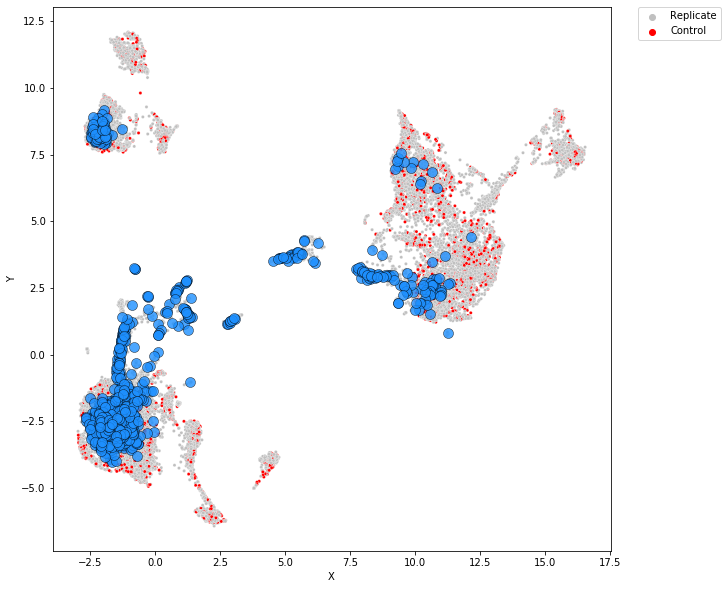

In [11]:
plt.figure(figsize=(10,10))
g = sb.scatterplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["silver", "red"])
h = sb.scatterplot(data=main, x="X", y="Y", s=100, color="dodgerblue", linewidth=0.5, edgecolor="black", alpha=0.8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
x_lims = (None, None)
y_lims = (None, None)
# g.set(xlim=x_lims)
# g.set(ylim=y_lims)

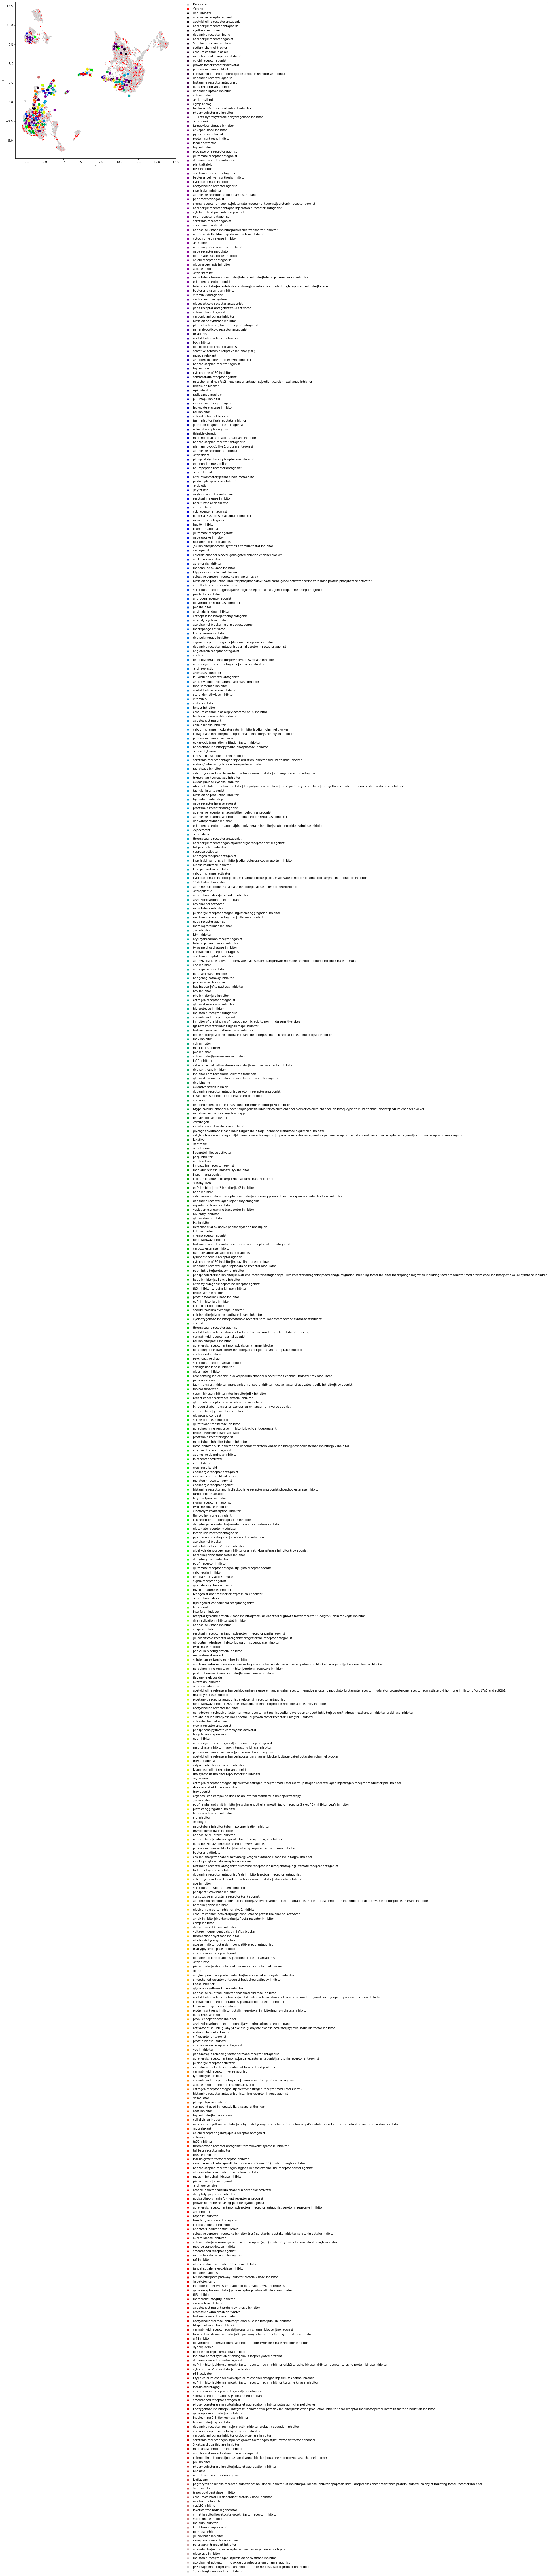

In [12]:
plt.figure(figsize=(10,10))
g = sb.scatterplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["silver", "red"])
h = sb.scatterplot(data=main, x="X", y="Y", s=100, hue="Metadata_moa.x", palette="nipy_spectral")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

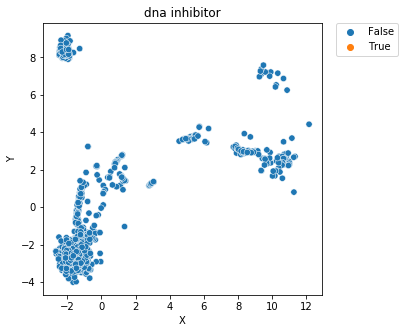

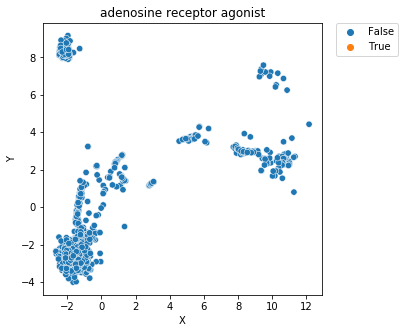

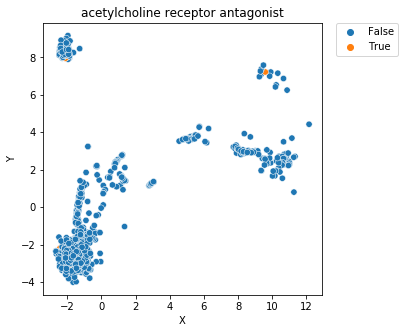

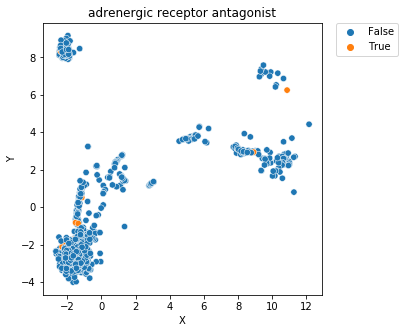

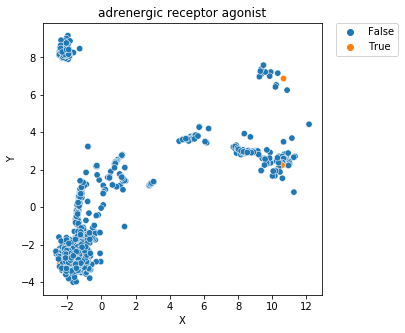

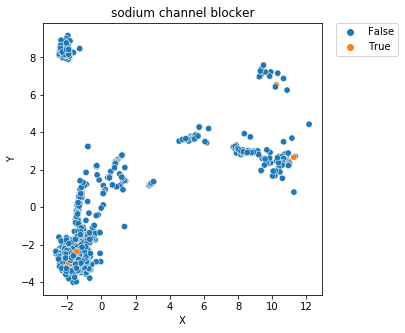

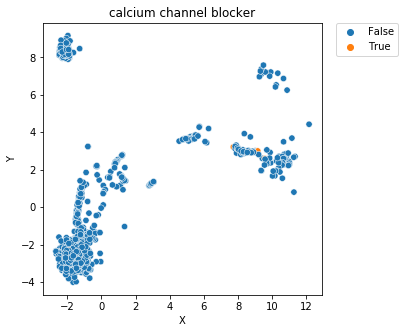

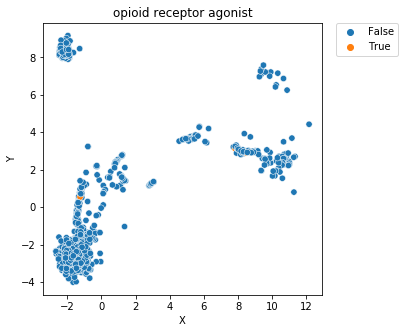

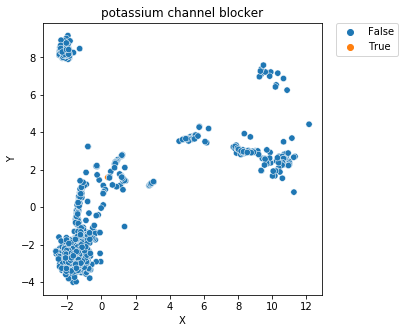

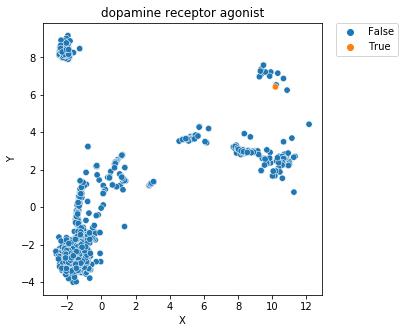

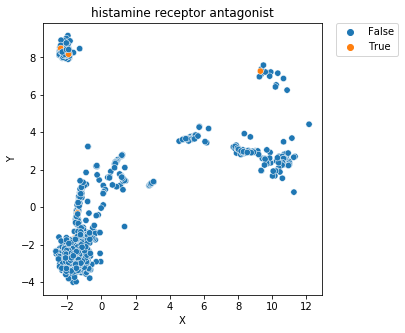

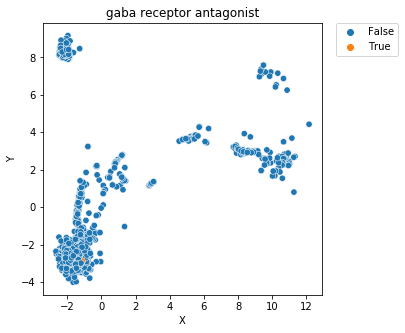

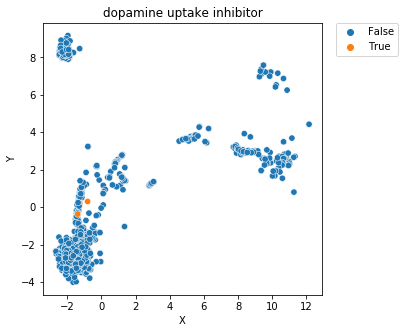

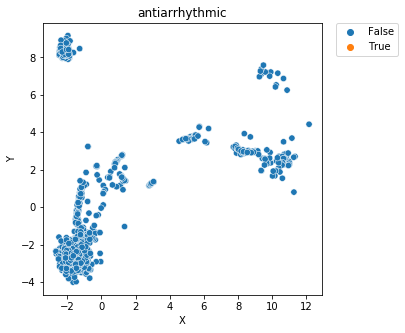

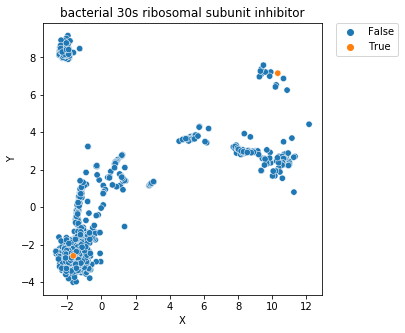

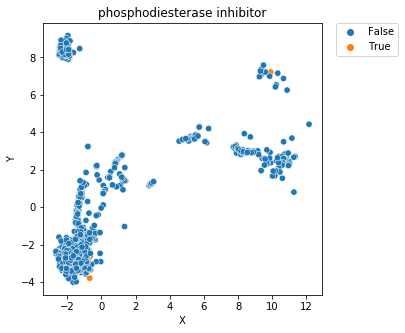

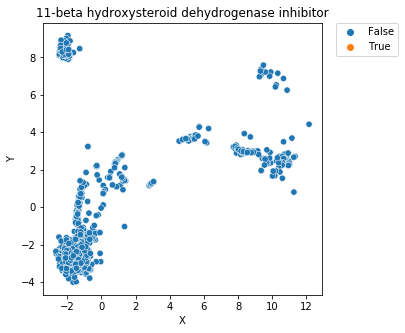

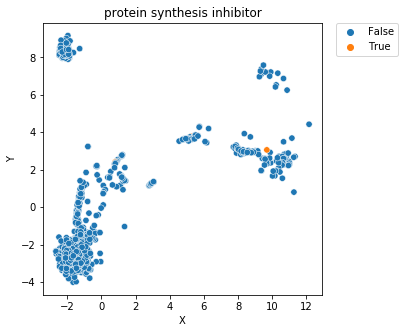

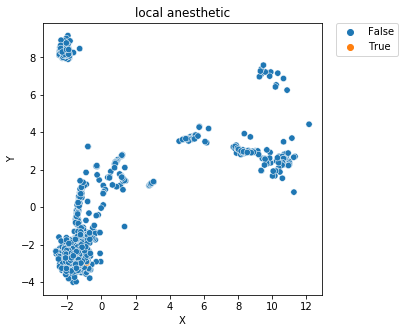

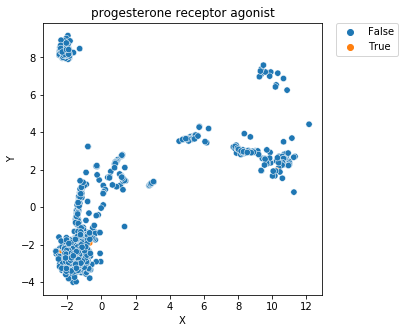

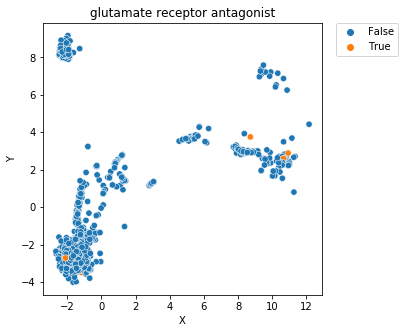

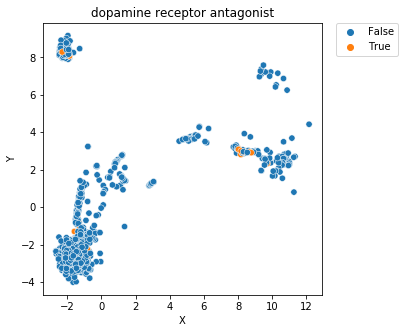

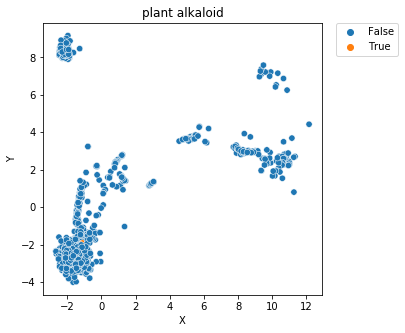

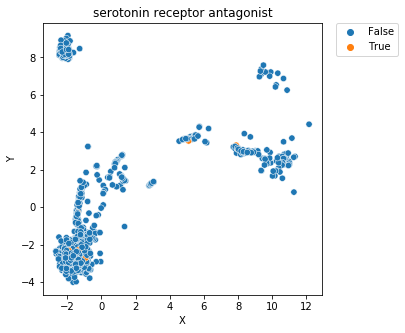

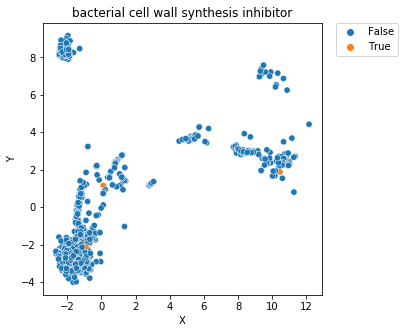

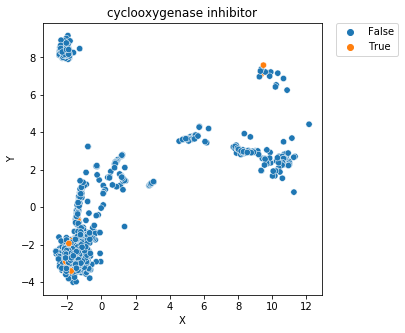

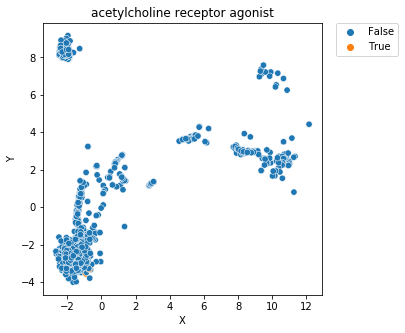

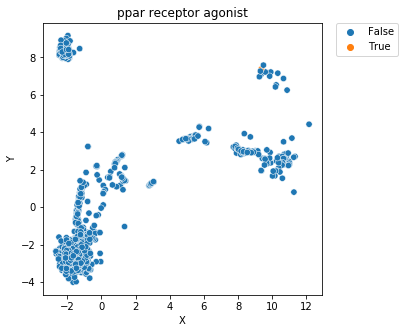

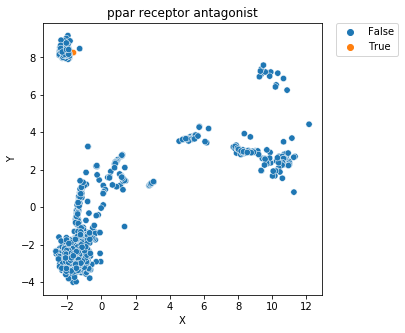

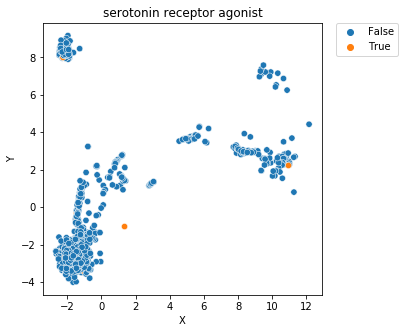

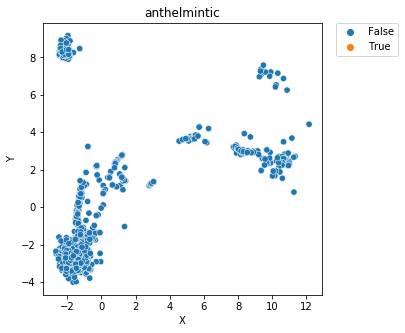

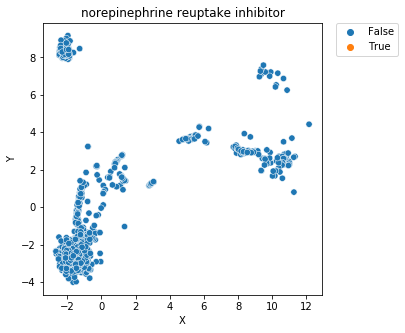

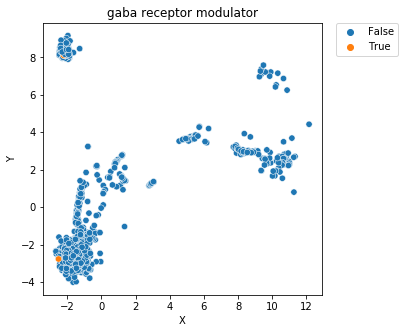

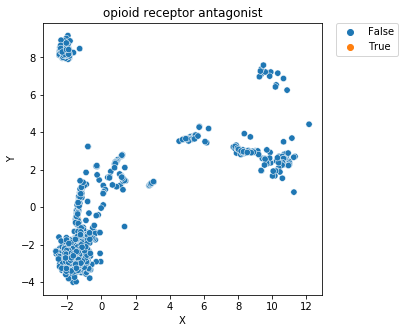

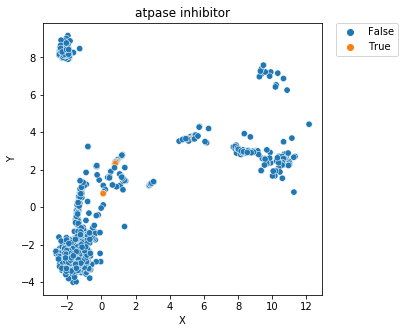

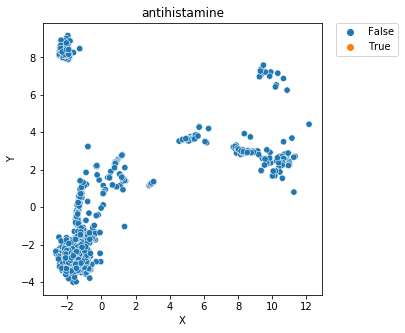

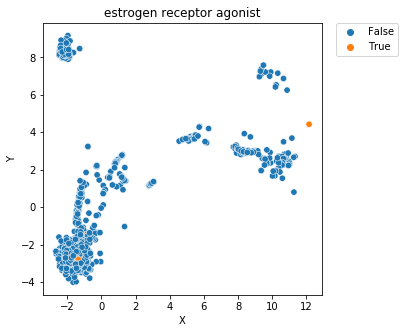

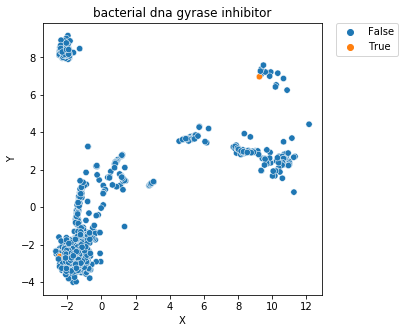

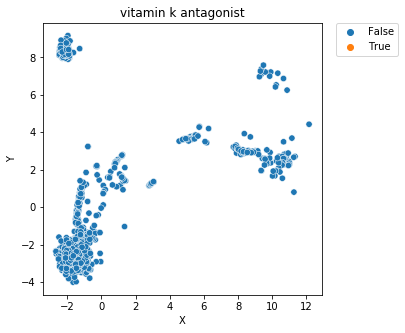

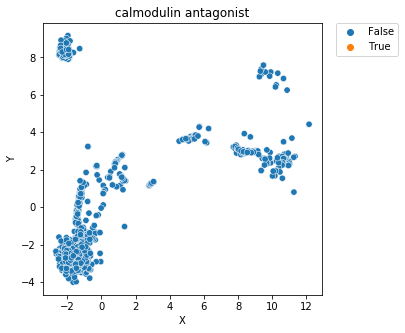

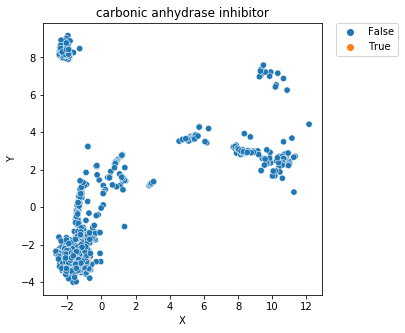

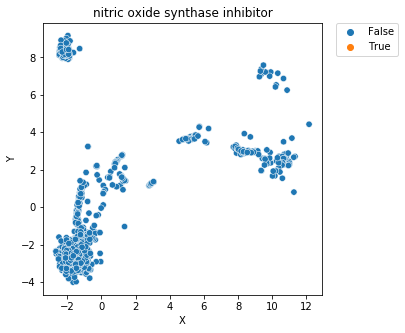

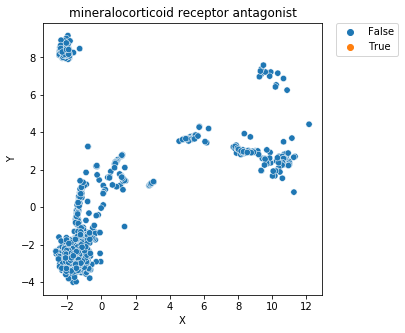

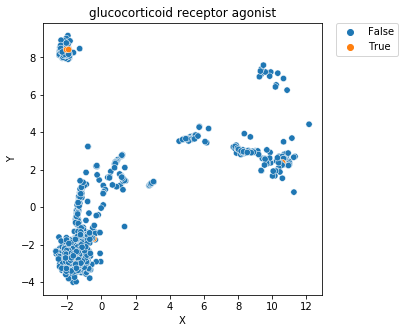

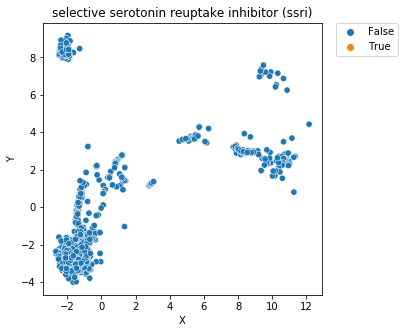

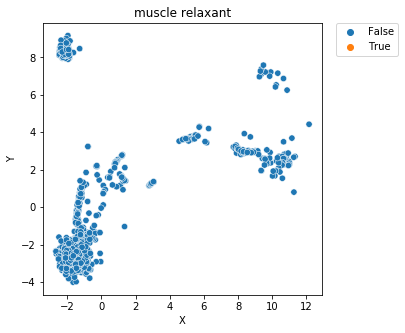

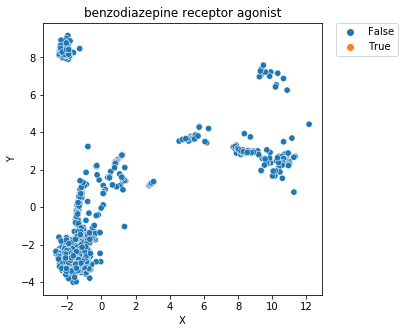

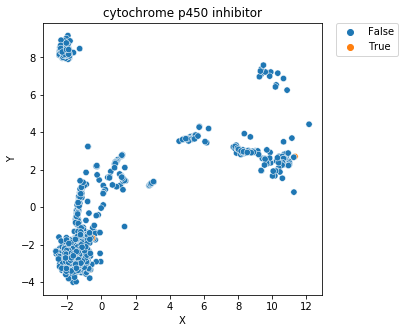

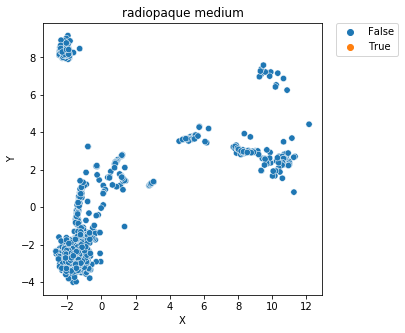

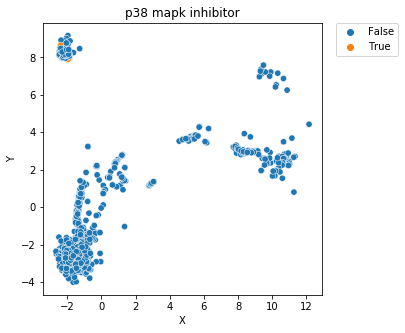

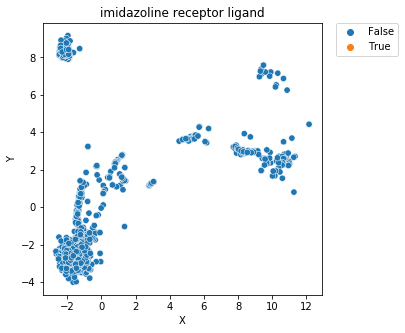

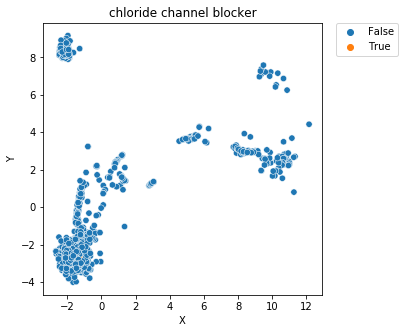

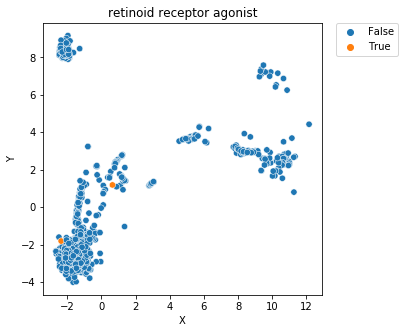

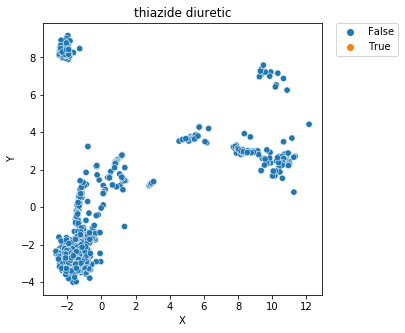

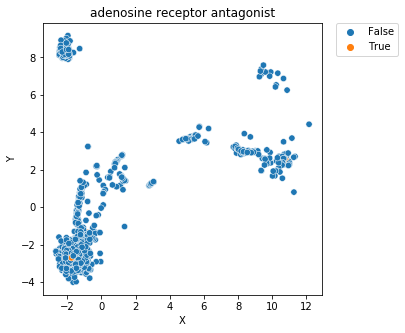

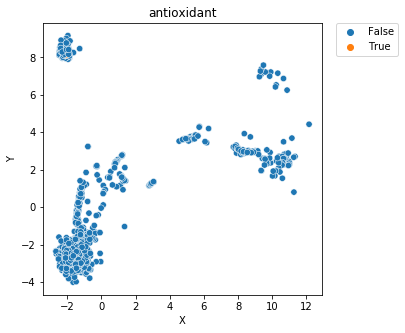

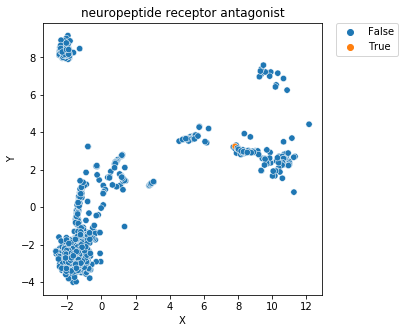

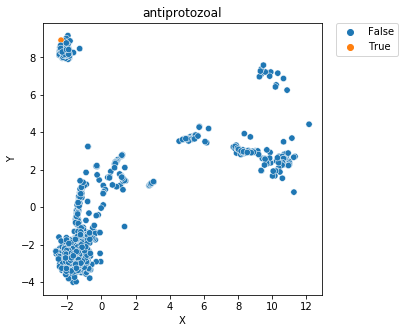

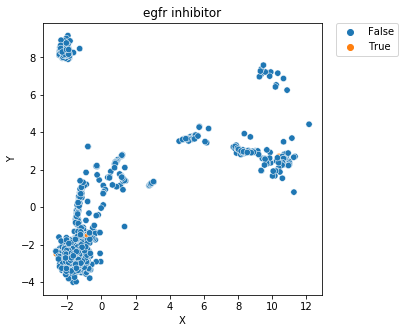

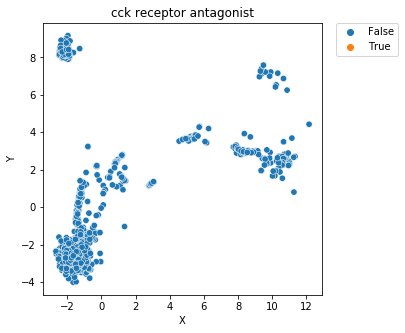

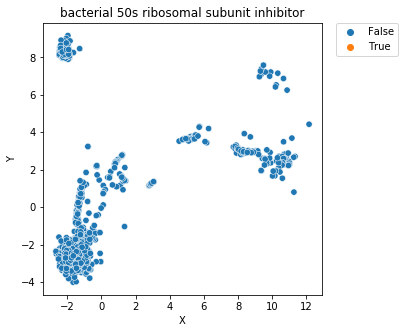

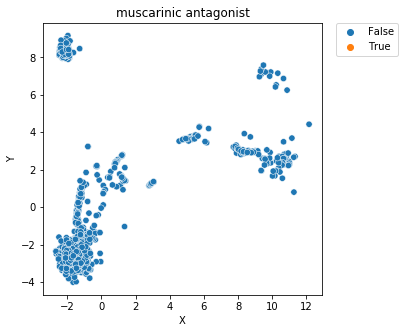

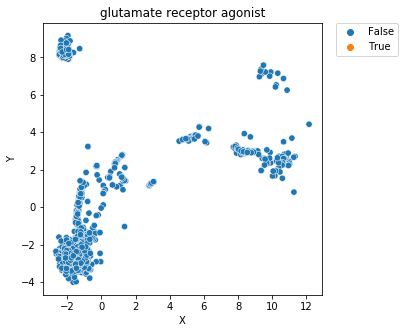

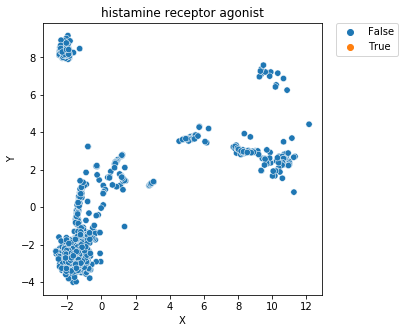

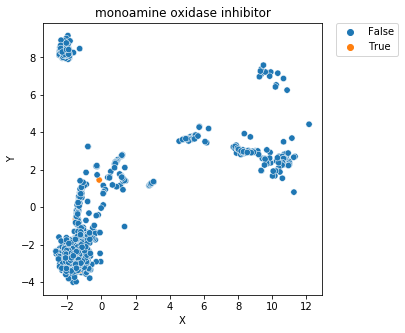

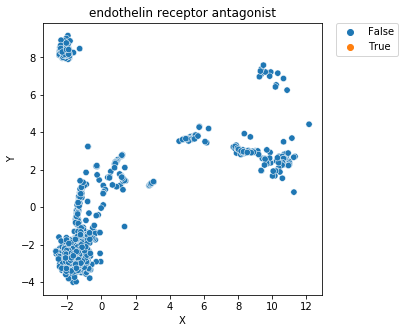

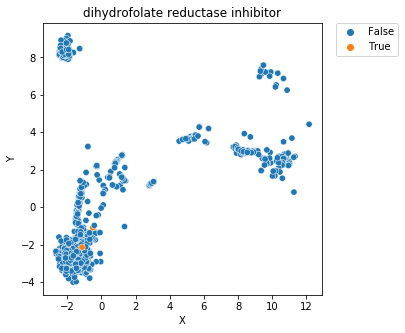

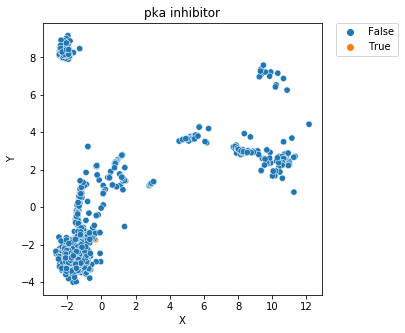

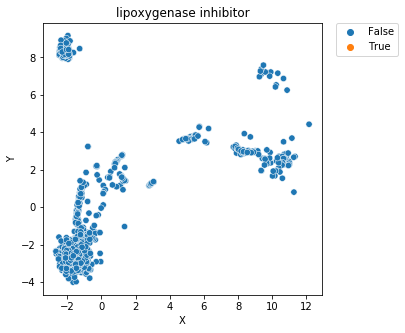

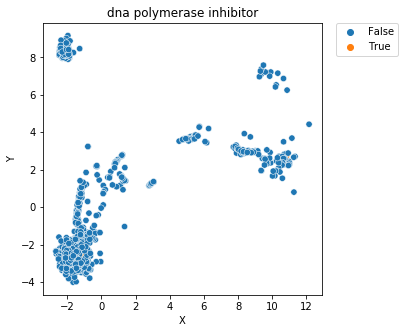

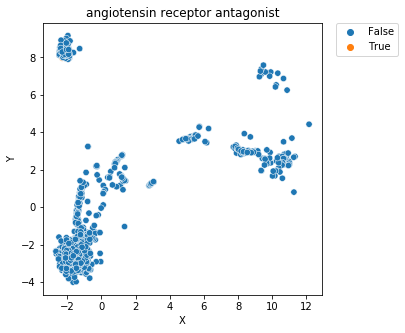

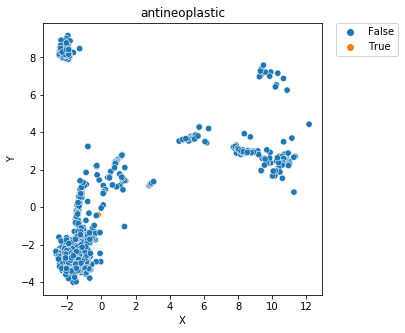

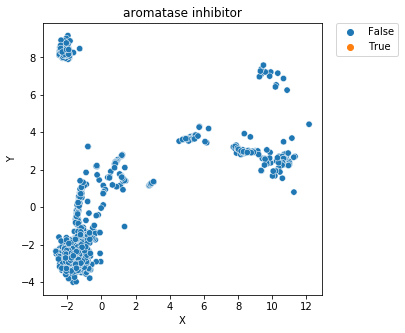

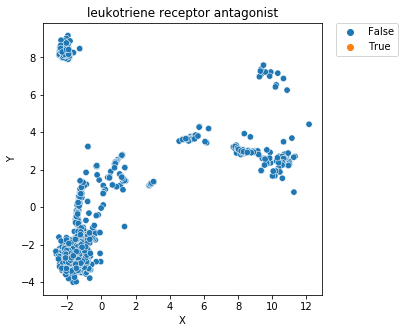

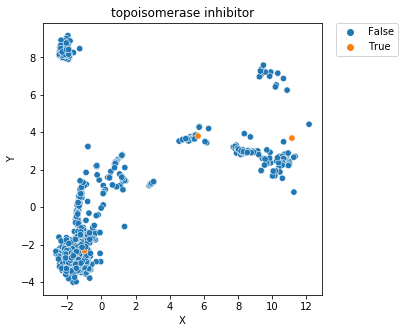

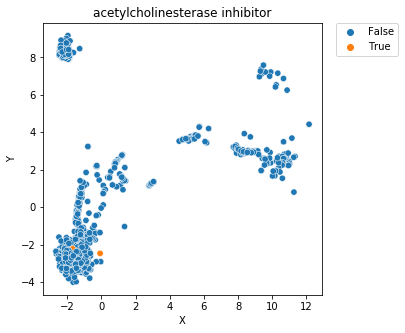

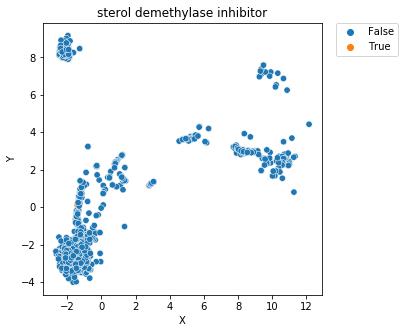

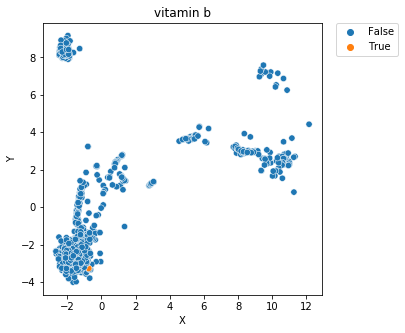

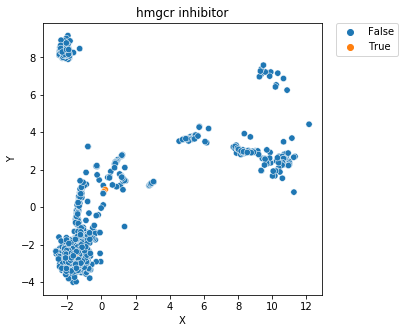

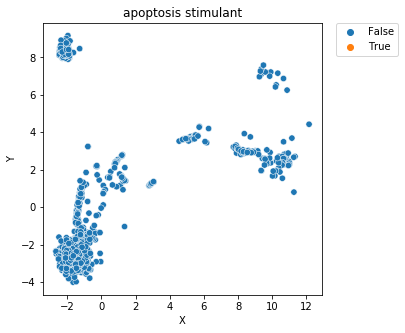

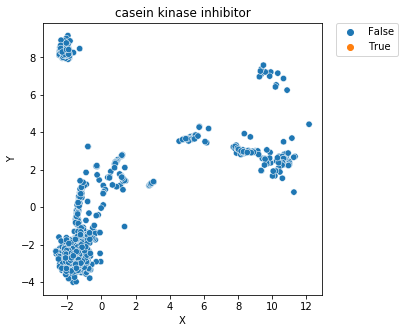

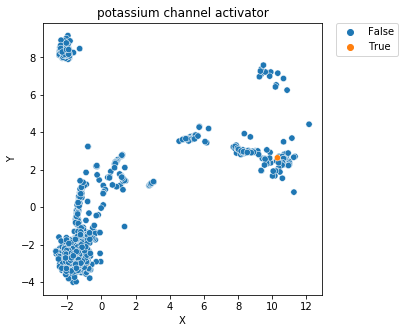

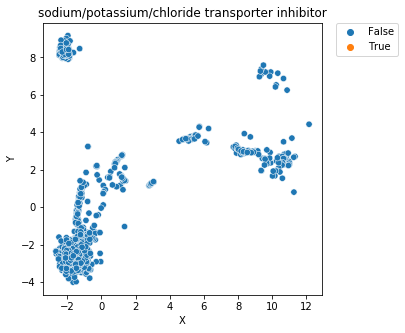

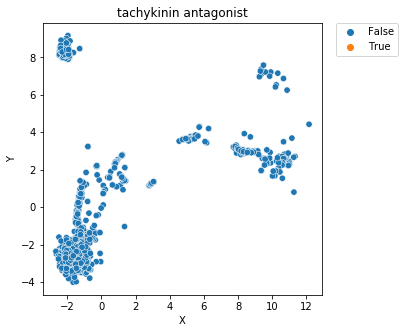

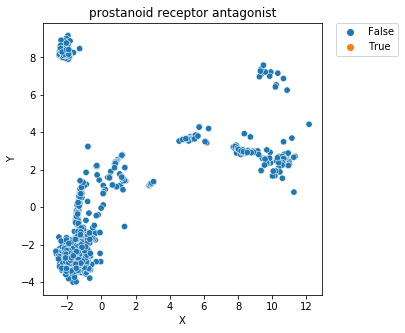

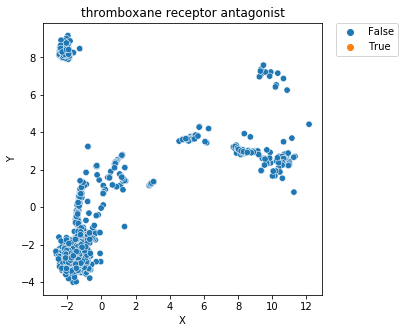

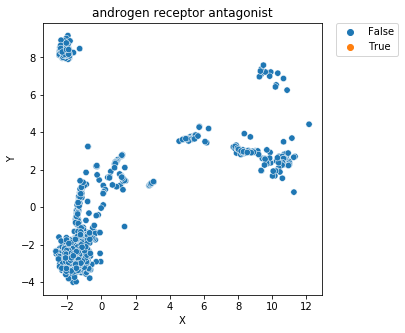

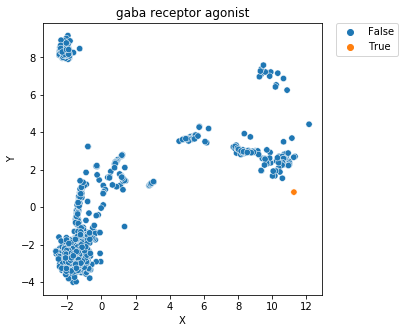

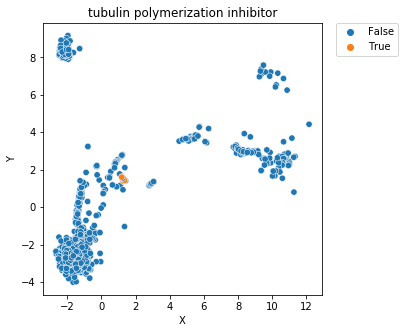

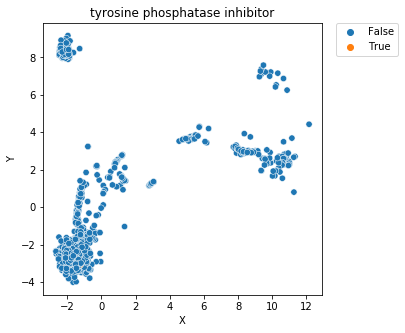

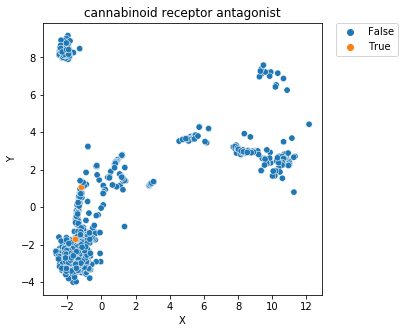

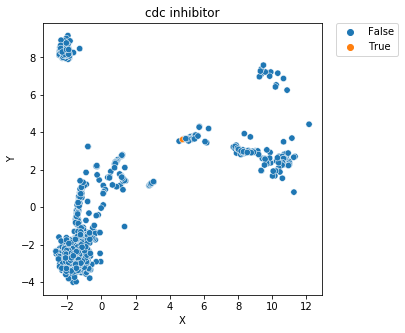

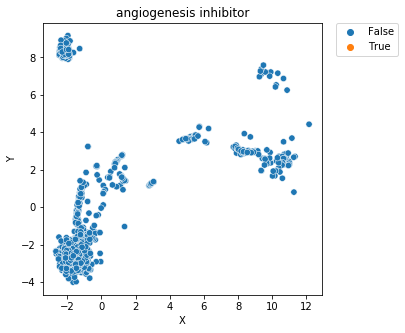

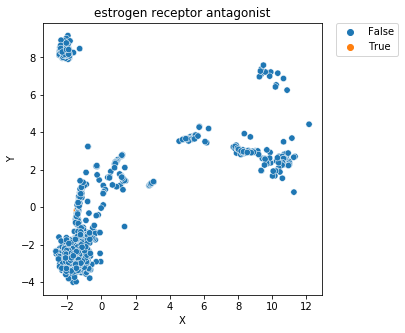

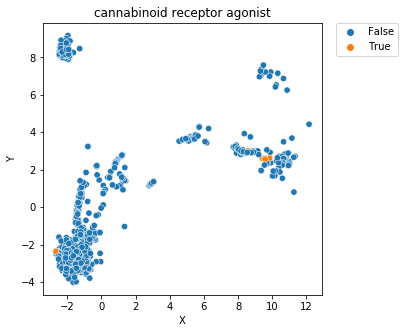

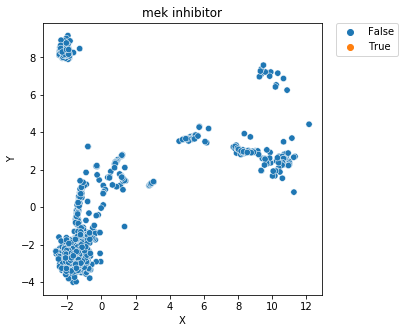

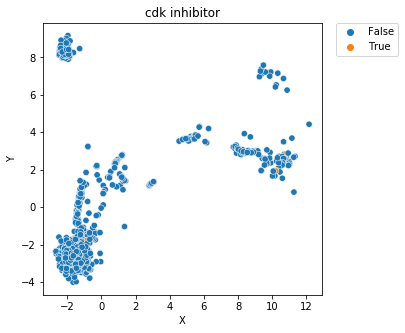

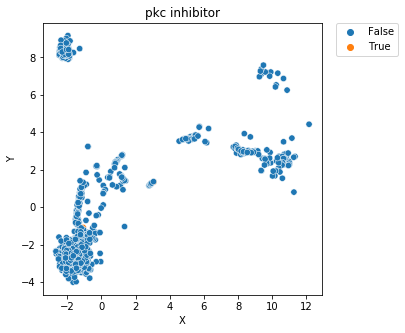

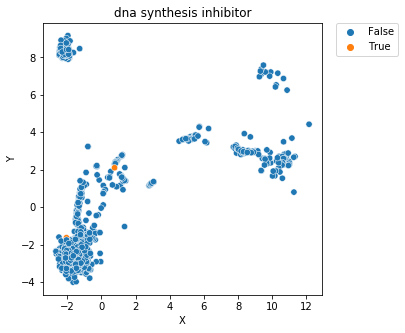

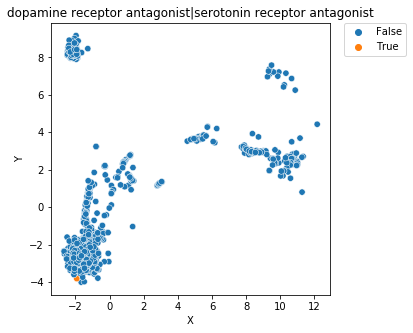

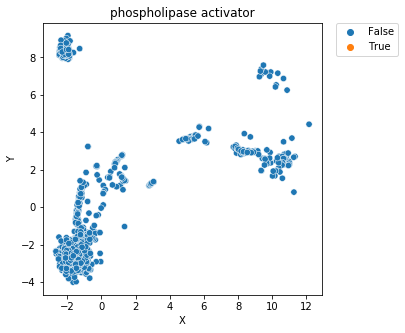

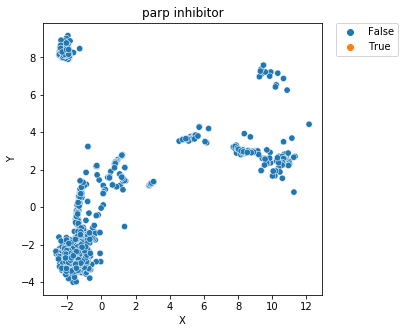

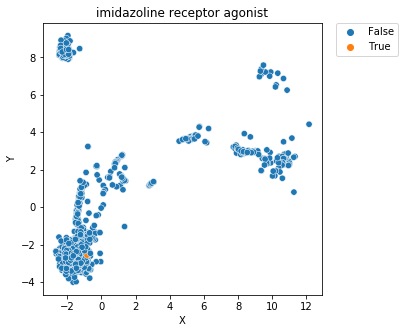

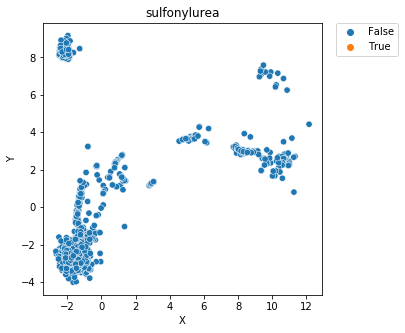

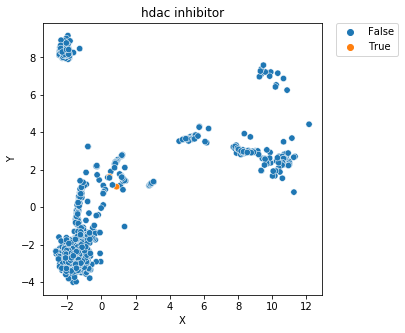

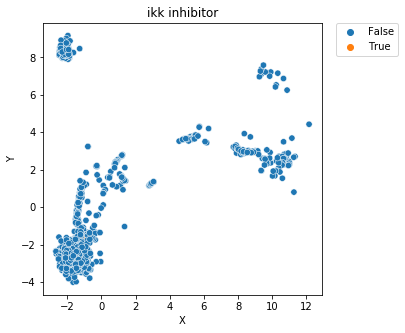

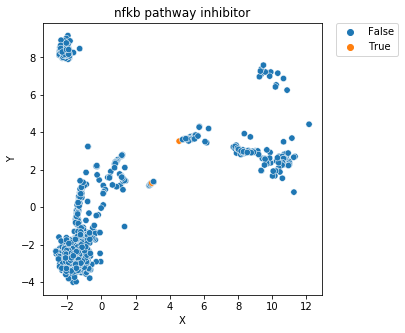

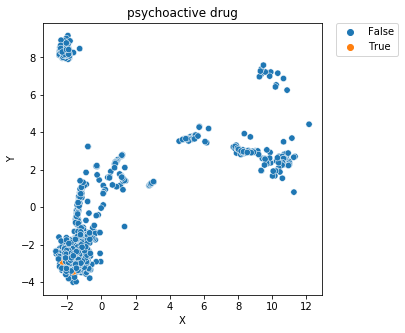

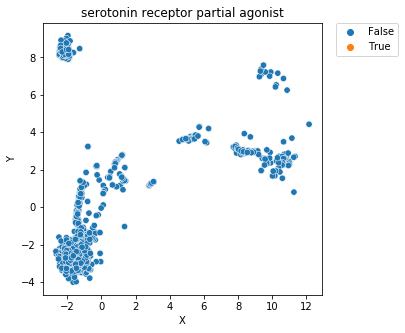

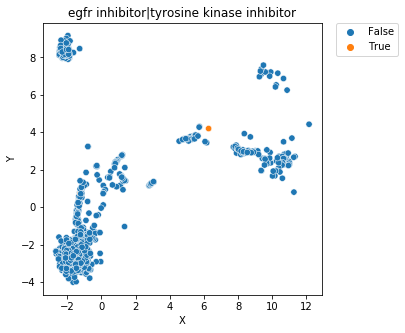

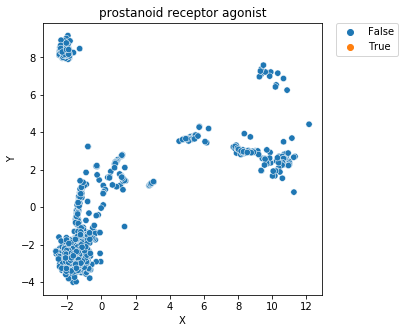

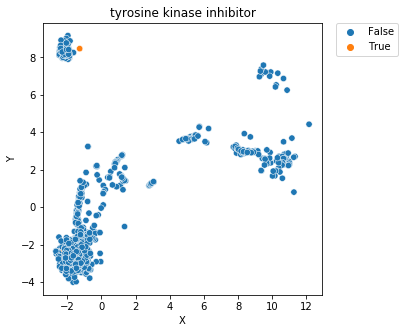

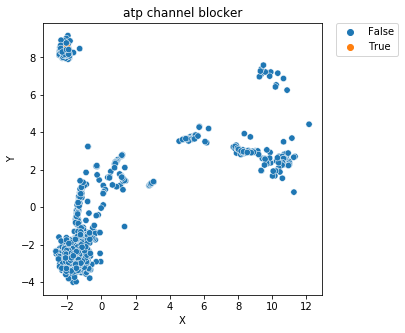

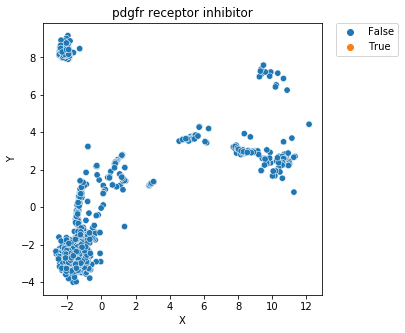

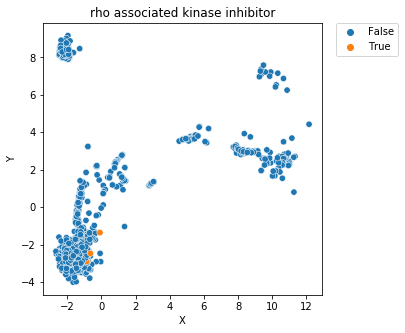

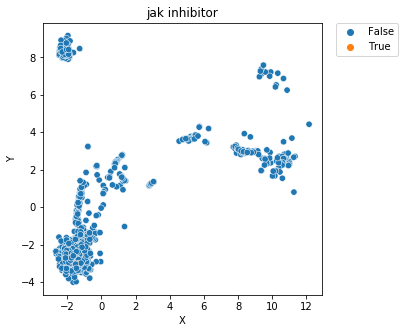

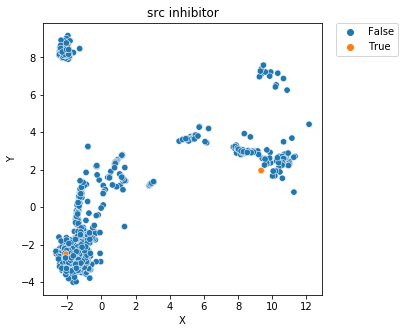

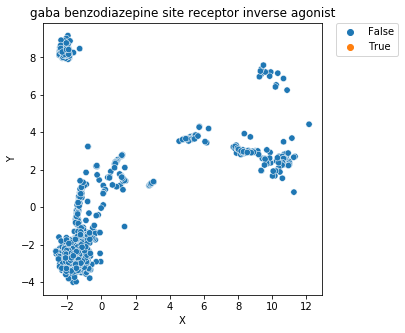

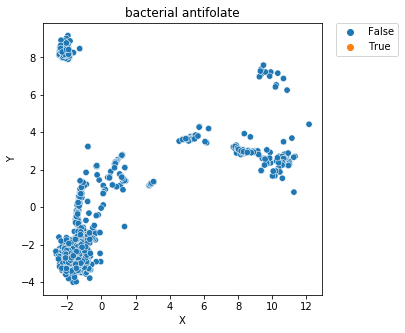

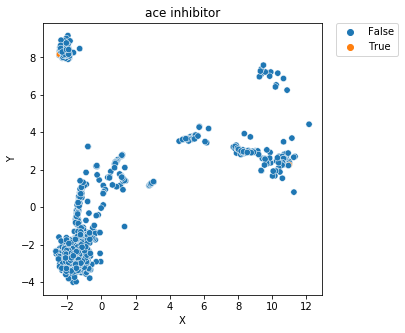

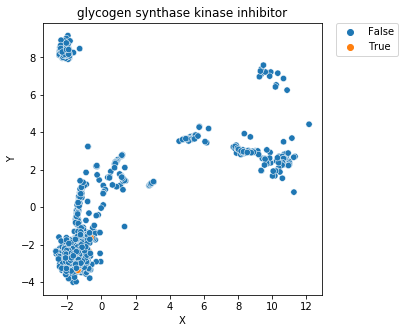

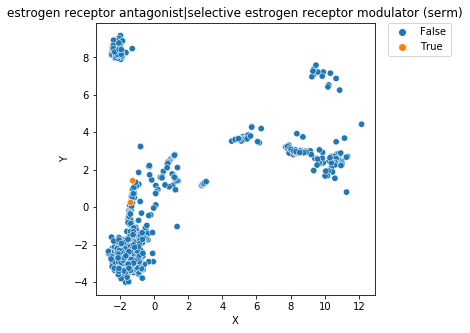

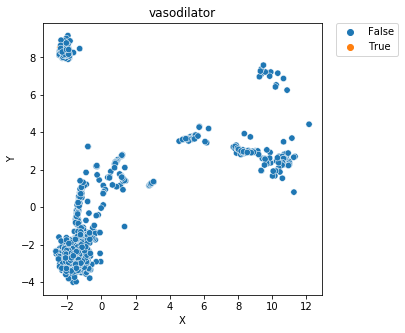

In [13]:
main["Display"] = False
for moa in main["Metadata_moa.x"].unique():
    main.Display = main["Metadata_moa.x"] == moa
    if np.sum(main.Display) < 3: continue
    plt.figure(figsize=(5,5))
    g = sb.scatterplot(data=main, x="X", y="Y", s=40, hue="Display")
    g.set(title=moa)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.set(xlim=x_lims)
    g.set(ylim=y_lims)
    plt.show()